In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: ignored

In [ ]:
filename = 'COT.nc'
data1 = nc.Dataset(filename)
f = 'CTH.nc'
data2 = nc.Dataset(f)
f = 'VI_B.nc'
data3 = nc.Dataset(f)
f = 'IR.nc'
data4 = nc.Dataset(f)

In [ ]:
vi_b = np.array(data3.variables['image_pixel_values'][:].data)
ir = np.array(data4.variables['image_pixel_values'][:].data)
cot = np.array(data1.variables['COT'][:].data)
cth = np.array(data2.variables['CTH'][:].data)

In [ ]:
cot = cot[1034:1575,1430:1761]
cth = cth[1034:1575,1430:1761]
ir = ir[1034:1575,1430:1761]
vi_b = vi_b[1034*2:1575*2,1430*2:1761*2]


In [ ]:
cot_df = pd.DataFrame(cot)
cth_df = pd.DataFrame(cth)

In [ ]:
cot = np.array(cot_df[cot_df < 158.00])
cth = np.array(cth_df[cth_df < 1600.00])
#np.nan_to_num(cot,0)
#np.nan_to_num(cth,0)


In [ ]:
cot.max()

nan

In [ ]:
cot

array([[      nan,       nan, 12.429999, ...,       nan,       nan,
              nan],
       [      nan,       nan, 12.429999, ...,       nan,       nan,
              nan],
       [      nan,       nan,  8.87    , ...,       nan,       nan,
              nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

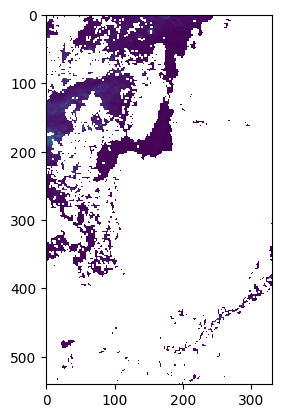

In [ ]:
plt.imshow(cot)
plt.show()

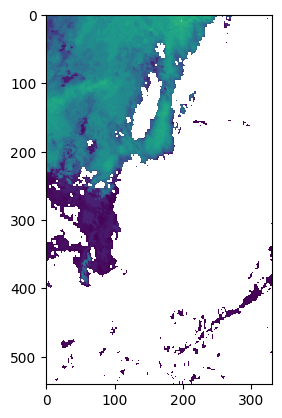

In [ ]:
plt.imshow(cth)
plt.show()

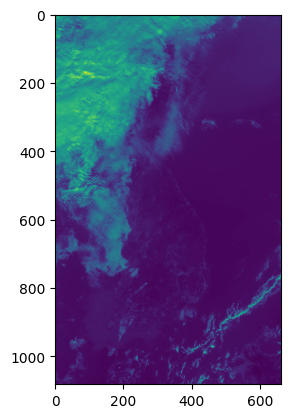

In [ ]:
%matplotlib inline

plt.imshow(vi_b)

plt.show()

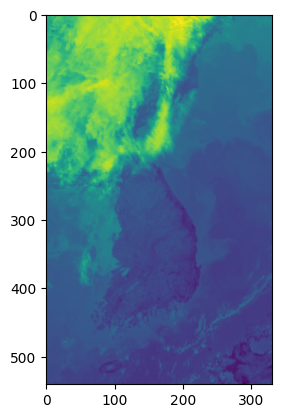

In [ ]:
plt.imshow(ir)
plt.show()

In [ ]:
vi_b_nonnull = np.zeros((541, 331), 'float64')
vi_b_nonnull.shape
lat = np.zeros((541, 331), 'float64')
log = np.zeros((541, 331), 'float64')

In [ ]:
for i in range(0, 541):
    for j in range(0, 331):
        value = (vi_b[i*2][j*2] + vi_b[i*2][j*2 + 1] + vi_b[i*2 + 1][j*2] + vi_b[i*2 + 1][j*2 + 1]) / 4
        vi_b_nonnull[i][j] = value
        lat[i][j] = int(i/2)
        log[i][j] = int(j/2)


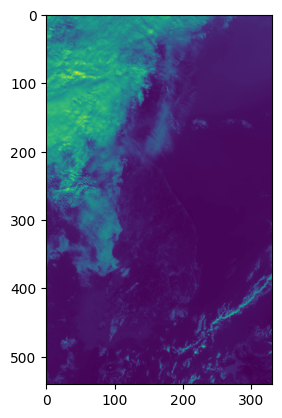

In [ ]:
plt.imshow(vi_b_nonnull)

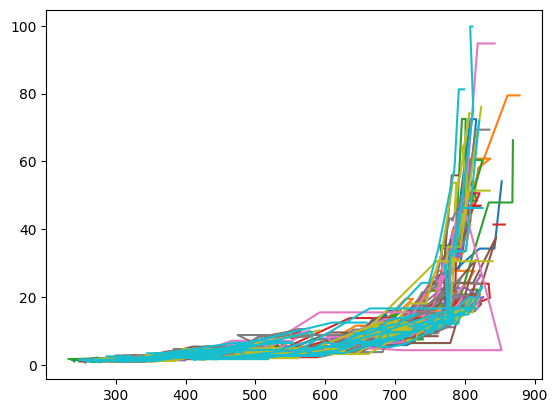

In [ ]:
i = 2134
for i in range(10):
    plt.plot(vi_b_nonnull[:,i],cot[:,i])


In [ ]:
mask =~( np.isnan(cot)|np.isnan(cth)|np.isnan(ir)|np.isnan(vi_b_nonnull))
ncot = cot[mask]
ncth = cth[mask]
nir = ir[mask]
nvi_b = vi_b_nonnull[mask]
nlat = lat[mask]





In [ ]:
import seaborn as sns

<Axes: >

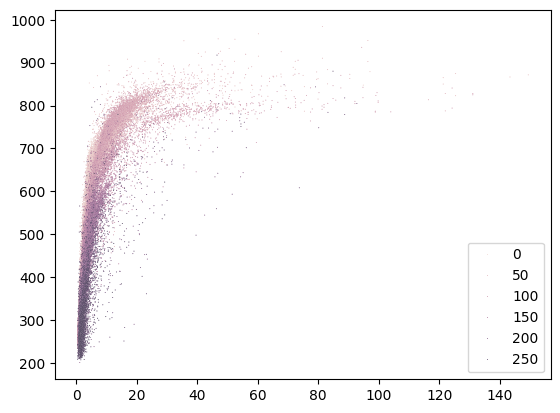

In [ ]:
sns.scatterplot(x = ncot,y = nvi_b,hue = nlat,s = 0.5)

In [ ]:
ncot.shape

(46887,)

In [ ]:
import seaborn as sns

<Axes: >

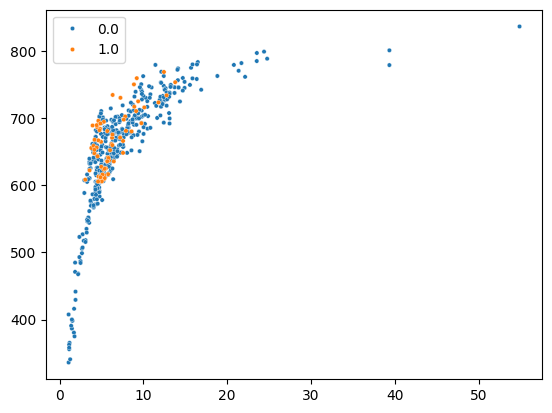

In [ ]:
sns.scatterplot(x= ncot[0:500],y = nvi_b[0:500],s = 10,hue = nlat[0:500])

<Axes: >

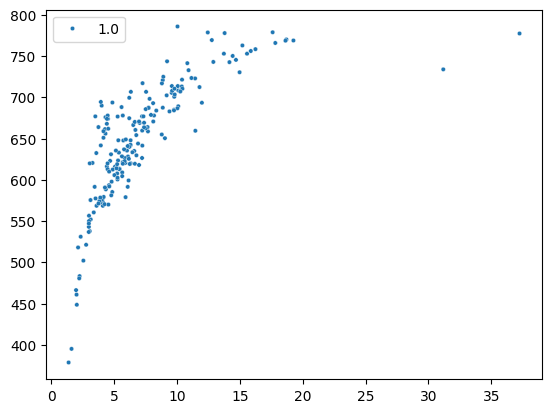

In [ ]:
sns.scatterplot(x= ncot[500:800],y = nvi_b[500:800],s = 10,hue = nlat[500:800])

<Axes: >

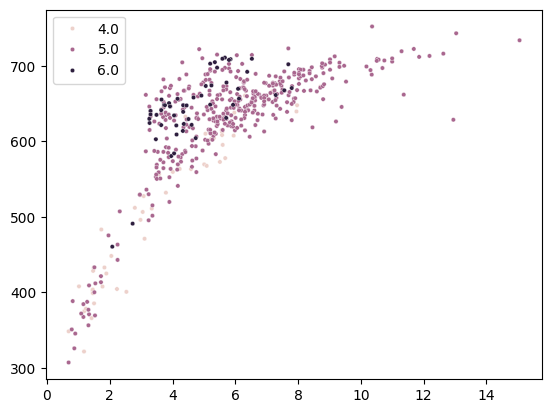

In [ ]:
sns.scatterplot(x= ncot[2000:2500],y = nvi_b[2000:2500],s = 10,hue = nlat[2000:2500])

Model

In [ ]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

In [ ]:
cot = cot.reshape(-1,1)
cth = cth.reshape(-1,1)
ir = ir.reshape(-1,1)
vi_b_nonnull = vi_b_nonnull.reshape(-1,1)
lat = lat.reshape(-1,1)
log = log.reshape(-1,1)



In [ ]:
cot[0:10000],vi_b_nonnull[0:10000]

(array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([[184.  ],
        [185.75],
        [187.  ],
        ...,
        [223.5 ],
        [221.5 ],
        [221.  ]]))

In [ ]:
vi_b_nonnull.max()

1917.0

In [ ]:
ncot.shape[0],cot.shape[0]

(2229470, 7800000)

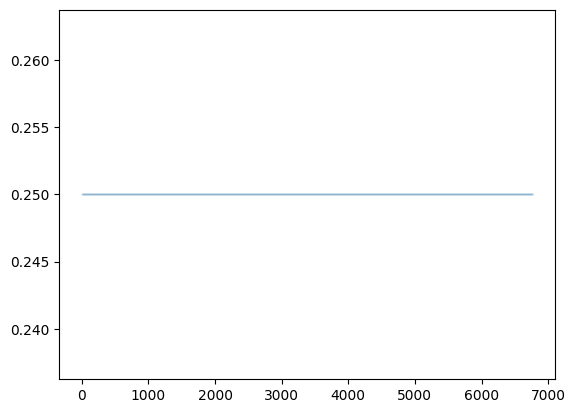

In [ ]:
plt.scatter(np.arange(ncot[0:1000000].shape[0]),ncot[0:1000000],s = 0.01,alpha=0.1)

In [ ]:
ncot = cot[(cot!=0)&(cot<0.26)]
print(ncot.shape[0])


6769


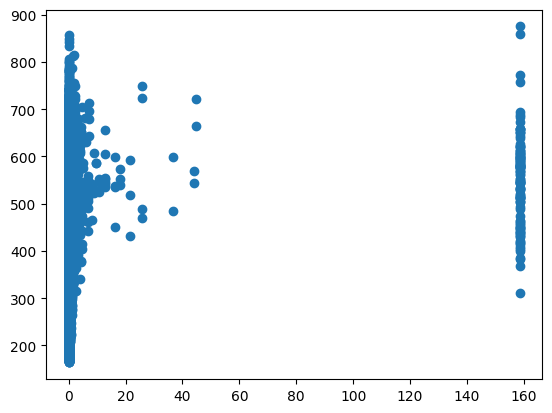

In [ ]:
plt.scatter(cot[0:2000000],vi_b_nonnull[0:2000000])

In [ ]:
log.shape

(541, 331)

In [ ]:
xvi = np.column_stack ((nvi_b,nlat))
xir = np.column_stack((nir, nlat))
y_ir = ncth
y_vi = ncot

In [ ]:
from sklearn.model_selection import train_test_split
train_data_vi, test_data_vi, train_target_vi, test_target_vi = train_test_split(xvi, y_vi)

In [ ]:
xvi

array([[748.  ,   0.  ],
       [774.  ,   0.  ],
       [769.  ,   0.  ],
       ...,
       [247.5 , 270.  ],
       [249.5 , 270.  ],
       [215.75, 270.  ]])

In [ ]:
modelvi = Sequential()
model_ir = Sequential()

In [ ]:
train_data_vi.shape,train_target_vi.shape

((35165, 2), (35165,))

In [ ]:
modelvi.add(Dense(64,input_dim = 2, activation='relu'))
modelvi.add(Dense(128, activation='relu'))
modelvi.add(Dropout(0.2))
modelvi.add(Dense(64, activation='relu'))
modelvi.add(Dense(1))
modelvi.compile(optimizer='adam', loss='mse', metrics='accuracy')

model_ir.add(Dense(64,input_dim = 2, activation='relu'))
model_ir.add(Dense(128, activation='relu'))
model_ir.add(Dropout(0.2))
model_ir.add(Dense(64, activation='relu'))
model_ir.add(Dense(1, activation='relu'))
model_ir.compile(optimizer='adam', loss='mse', metrics='accuracy')

In [ ]:
modelvi.fit(train_data_vi,train_target_vi,epochs=8)


Epoch 1/8
1099/1099 [==============================] - 5s 4ms/step - loss: 30.3460 - accuracy: 0.0013
Epoch 2/8
1099/1099 [==============================] - 5s 5ms/step - loss: 29.1800 - accuracy: 9.3843e-04
Epoch 3/8
1099/1099 [==============================] - 5s 5ms/step - loss: 28.8299 - accuracy: 8.8156e-04
Epoch 4/8
1099/1099 [==============================] - 5s 5ms/step - loss: 28.4043 - accuracy: 7.3937e-04
Epoch 5/8
1099/1099 [==============================] - 5s 4ms/step - loss: 27.8198 - accuracy: 5.6875e-04
Epoch 6/8
1099/1099 [==============================] - 5s 5ms/step - loss: 28.3040 - accuracy: 6.5406e-04
Epoch 7/8
1099/1099 [==============================] - 5s 5ms/step - loss: 27.7350 - accuracy: 5.9718e-04
Epoch 8/8
1099/1099 [==============================] - 5s 5ms/step - loss: 27.4965 - accuracy: 4.8344e-04


In [ ]:
pre = modelvi.predict(train_data_vi)

1099/1099 [==============================] - 2s 2ms/step


ValueError: x and y must be the same size

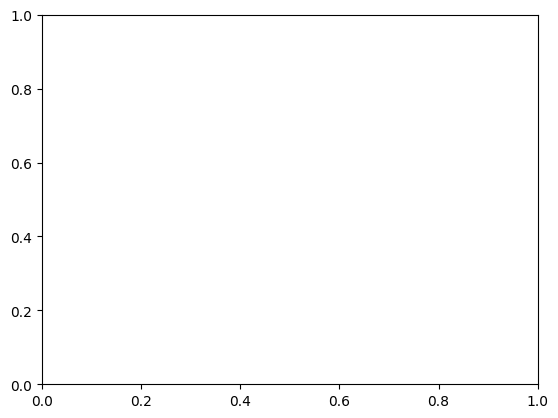

In [ ]:
plt.scatter(train_data_vi,pre,s = 0.5)

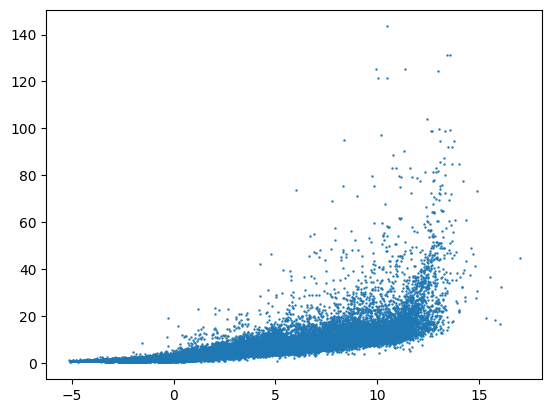

In [ ]:
plt.scatter(pre,train_target_vi,s = 0.5)

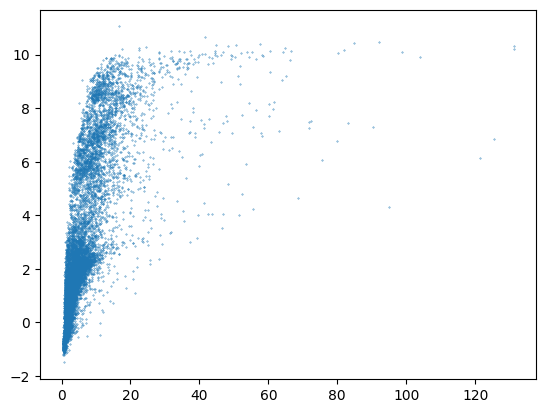

In [ ]:
plt.scatter(test_target_vi, pre,s = 0.1)

In [ ]:
from keras.metrics import R2Score


ImportError: cannot import name 'R2Score' from 'keras.metrics' (c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\metrics\__init__.py)